### Load Dataset

In [1]:
from sklearn.datasets import load_iris
iris= load_iris()

In [2]:
print(type(iris))      # View type of data
print()
# View dataset description using dataset built-in method DESCR
print(iris.DESCR)

<class 'sklearn.utils.Bunch'>

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ====

In [3]:
print(iris.feature_names)    # View features
print()                      
print(iris.target_names)     # View target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

['setosa' 'versicolor' 'virginica']


In [4]:
# Assign features data to x_feature
x_feature= iris.data
# assign target data to y_target
y_target= iris.target

##
print(x_feature.shape)   # Total observations
print(y_target.shape)

(150, 4)
(150,)


### KNN classifier method

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
x_new= [[3,5,4,2],[5,3,4,2]]

#### K=1

In [7]:
knn1= KNeighborsClassifier(n_neighbors= 1)
# fit data into KNN model (estimator)
knn1.fit(x_feature, y_target)
knn1.predict(x_new)            # Verginica, Versicolor

array([2, 1])

#### K=5

In [8]:
knn5= KNeighborsClassifier(n_neighbors= 5)
knn5.fit(x_feature, y_target)
knn1.predict(x_new)            # Verginica, Versicolor

array([2, 1])

#### Split data into Train and Test split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#  split x_feature and y_target into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x_feature, y_target, test_size=0.4, random_state=4)

In [11]:
print(x_train.shape, x_test.shape)  # shape of new x objects
print()
print(y_train.shape, y_test.shape)  # shape of new y objects

(90, 4) (60, 4)

(90,) (60,)


### Model performance using train/test split

#### K=1

In [12]:
knn1= KNeighborsClassifier(n_neighbors= 1)
knn1.fit(x_train, y_train)
y_pred= knn1.predict(x_test) 
print(metrics.accuracy_score(y_test, y_pred))

0.95


#### K=5

In [13]:
knn5= KNeighborsClassifier(n_neighbors= 5)
knn5.fit(x_train, y_train)
y_pred= knn5.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### Choosing best parameter in KNN Classifier

In [14]:
k_range= list(range(1,31))
scores= []
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred= knn.predict(x_test) 
    scores.append(metrics.accuracy_score(y_test, y_pred))

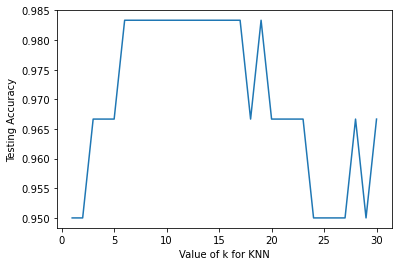

In [15]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#### K=12

In [16]:
knn5= KNeighborsClassifier(n_neighbors= 12)
knn5.fit(x_train, y_train)
y_pred= knn5.predict(x_test)
print('Accuracy in KNN Classifier Model:',metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


### Logistic Classification Method

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg= LogisticRegression()
logreg.fit(x_train, y_train)

y_pred= logreg.predict(x_test)
print('Accuracy in Logistic Regression Model:',metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


## Finalize KNN Classifier to make predictions on New Data

In [18]:
from sklearn.datasets import load_iris
iris= load_iris()

# Store features matrix in x
x_feature= iris.data
#Store target vector in y
y_target= iris.target

# Finalizing KNN Classifier after evaluation and choosing best 
# parameter
#Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=12)

# train the model with x and y
knn_model= knn.fit(x_feature, y_target)

# Save knn_model
import joblib
joblib.dump(knn_model, 'KNN_Classifier.pkl')

['KNN_Classifier.pkl']